<a href="https://colab.research.google.com/github/Cralsic123/Differen-DNN-on-Apple-quality-classification/blob/main/Differen_DNN_on_Apple_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv("/content/apple_quality.csv")

In [55]:
df = df.iloc[:-1]

In [56]:
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [58]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [59]:
df.fillna(0, inplace=True)

In [60]:
df.drop('A_id', axis=1, inplace = True)

In [61]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


<ipython-input-62-c6a08e7aad37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000


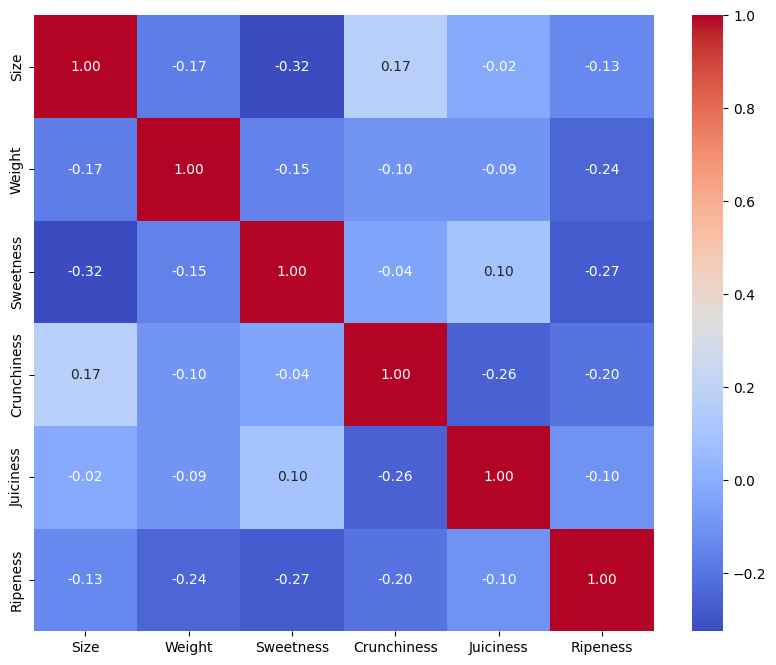

In [62]:
correlation_matrix = df.corr()


print(correlation_matrix)


import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [63]:
df.describe()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [79]:
df['Quality'].value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

In [80]:
df['Quality'].replace('bad', 0, inplace=True)
df['Quality'].replace('good', 1, inplace=True)

In [81]:
df['Quality'].value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

In [82]:
x = df.drop(columns = 'Quality', axis = 1)
y = df['Quality']

In [83]:
print(x)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity  
0     -0.491590483  
1     -0.722809367  
2      2.621636473  
3      0.790723217  
4      0.501984036

In [84]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [86]:
print(x_train)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
2774  1.749177 -0.672324  -0.639736    -0.443877   0.465553 -0.323230   
2247 -3.696848  0.761064   0.987403     2.574531   3.974331 -2.365228   
3034 -1.149329 -0.268539  -0.306435     1.210006  -0.527832 -0.405038   
1893  1.457536 -1.088102  -0.718263    -2.046923   2.717242 -0.235078   
3095 -1.053627  0.168311   0.108895     2.525975  -2.108337  0.131820   
...        ...       ...        ...          ...        ...       ...   
3606 -0.643458 -0.107457  -1.041029     2.152756   0.592408 -2.736255   
1608 -1.167452 -2.279614   1.242500     2.690916   0.019712  1.536990   
2541 -3.824104 -0.653506   2.017481    -0.650462  -0.267903 -3.810387   
2575  2.180187 -1.511394  -2.686208    -2.396660   1.132262  2.050631   
3240  0.101584 -0.315758  -1.972458     0.584135   2.133440 -0.009840   

           Acidity  
2774   0.215333082  
2247  -2.839214332  
3034  -0.782556409  
1893   1.126991099  
3095   1.239641077

In [96]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64


In [98]:
print(x.shape,x_train.shape,x_test.shape)

(4000, 7) (3200, 7) (800, 7)


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

In [101]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [107]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])




In [108]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=40)

Epoch 1/40
90/90 [==============================] - 0s 5ms/step - loss: 0.2155 - accuracy: 0.9111 - val_loss: 0.3043 - val_accuracy: 0.8562
Epoch 2/40
90/90 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.9122 - val_loss: 0.2954 - val_accuracy: 0.8687
Epoch 3/40
90/90 [==============================] - 1s 6ms/step - loss: 0.2045 - accuracy: 0.9163 - val_loss: 0.2924 - val_accuracy: 0.8781
Epoch 4/40
90/90 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.9198 - val_loss: 0.2846 - val_accuracy: 0.8781
Epoch 5/40
90/90 [==============================] - 1s 6ms/step - loss: 0.1983 - accuracy: 0.9184 - val_loss: 0.2879 - val_accuracy: 0.8781
Epoch 6/40
90/90 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.9226 - val_loss: 0.3038 - val_accuracy: 0.8813
Epoch 7/40
90/90 [==============================] - 0s 5ms/step - loss: 0.1908 - accuracy: 0.9174 - val_loss: 0.2979 - val_accuracy: 0.8813
Epoch 8/40
90/90 [==

In [113]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [115]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [117]:
# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=40)

Epoch 1/40
90/90 [==============================] - 1s 9ms/step - loss: 0.3271 - accuracy: 0.8549 - val_loss: 0.3733 - val_accuracy: 0.8313
Epoch 2/40
90/90 [==============================] - 2s 21ms/step - loss: 0.3205 - accuracy: 0.8545 - val_loss: 0.3677 - val_accuracy: 0.8344
Epoch 3/40
90/90 [==============================] - 1s 10ms/step - loss: 0.3139 - accuracy: 0.8587 - val_loss: 0.3626 - val_accuracy: 0.8375
Epoch 4/40
90/90 [==============================] - 1s 7ms/step - loss: 0.3081 - accuracy: 0.8635 - val_loss: 0.3647 - val_accuracy: 0.8281
Epoch 5/40
90/90 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8670 - val_loss: 0.3622 - val_accuracy: 0.8313
Epoch 6/40
90/90 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.8684 - val_loss: 0.3466 - val_accuracy: 0.8375
Epoch 7/40
90/90 [==============================] - 0s 4ms/step - loss: 0.2939 - accuracy: 0.8694 - val_loss: 0.3459 - val_accuracy: 0.8438
Epoch 8/40
90/90 [

In [118]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(20, activation='softmax'),
                          keras.layers.Dense(20, activation='softmax'),
                          keras.layers.Dense(20, activation='softmax'),
                          keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=40)


Epoch 1/40
90/90 [==============================] - 2s 8ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6945 - val_accuracy: 0.4531
Epoch 2/40
90/90 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5024 - val_loss: 0.6928 - val_accuracy: 0.5906
Epoch 3/40
90/90 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5059 - val_loss: 0.6920 - val_accuracy: 0.5625
Epoch 4/40
90/90 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.6153 - val_loss: 0.6909 - val_accuracy: 0.6438
Epoch 5/40
90/90 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6681 - val_loss: 0.6857 - val_accuracy: 0.7344
Epoch 6/40
90/90 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.7733 - val_loss: 0.6736 - val_accuracy: 0.7594
Epoch 7/40
90/90 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.7830 - val_loss: 0.6482 - val_accuracy: 0.7688
Epoch 8/40
90/90 [==

In [120]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(20, activation='tanh'),
                          keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=40)


Epoch 1/40
90/90 [==============================] - 2s 5ms/step - loss: 0.5860 - accuracy: 0.6663 - val_loss: 0.5552 - val_accuracy: 0.7188
Epoch 2/40
90/90 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7660 - val_loss: 0.5313 - val_accuracy: 0.7469
Epoch 3/40
90/90 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.8049 - val_loss: 0.4344 - val_accuracy: 0.7875
Epoch 4/40
90/90 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8333 - val_loss: 0.4054 - val_accuracy: 0.8313
Epoch 5/40
90/90 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8538 - val_loss: 0.3921 - val_accuracy: 0.8156
Epoch 6/40
90/90 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8618 - val_loss: 0.3788 - val_accuracy: 0.8219
Epoch 7/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8774 - val_loss: 0.3709 - val_accuracy: 0.8344
Epoch 8/40
90/90 [==

In [128]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=40)


Epoch 1/40
90/90 [==============================] - 2s 5ms/step - loss: 0.5660 - accuracy: 0.6958 - val_loss: 0.3877 - val_accuracy: 0.8188
Epoch 2/40
90/90 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8431 - val_loss: 0.3567 - val_accuracy: 0.8469
Epoch 3/40
90/90 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8604 - val_loss: 0.3409 - val_accuracy: 0.8656
Epoch 4/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.8677 - val_loss: 0.3357 - val_accuracy: 0.8625
Epoch 5/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.8764 - val_loss: 0.3430 - val_accuracy: 0.8750
Epoch 6/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.8858 - val_loss: 0.3249 - val_accuracy: 0.8781
Epoch 7/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.8851 - val_loss: 0.3182 - val_accuracy: 0.8656
Epoch 8/40
90/90 [==

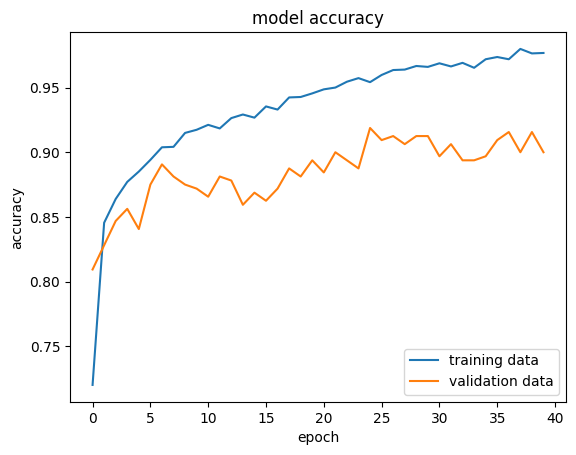

In [122]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

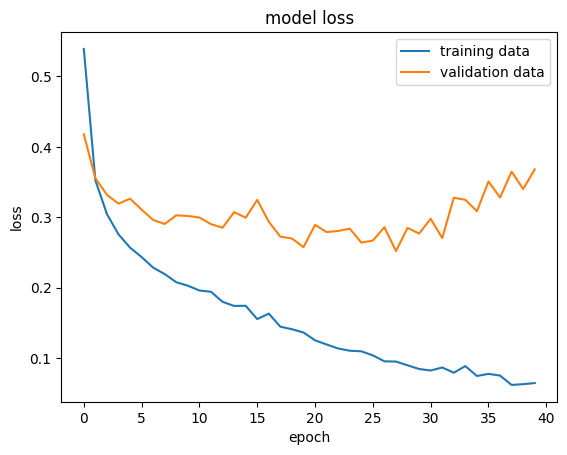

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [124]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=40)

Epoch 1/40
90/90 [==============================] - 2s 8ms/step - loss: 0.6214 - accuracy: 0.6622 - val_loss: 0.5392 - val_accuracy: 0.7469
Epoch 2/40
90/90 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8087 - val_loss: 0.4188 - val_accuracy: 0.8125
Epoch 3/40
90/90 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8413 - val_loss: 0.3657 - val_accuracy: 0.8219
Epoch 4/40
90/90 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8580 - val_loss: 0.3620 - val_accuracy: 0.8344
Epoch 5/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2926 - accuracy: 0.8628 - val_loss: 0.3384 - val_accuracy: 0.8500
Epoch 6/40
90/90 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.8743 - val_loss: 0.3195 - val_accuracy: 0.8531
Epoch 7/40
90/90 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8785 - val_loss: 0.3295 - val_accuracy: 0.8687
Epoch 8/40
90/90 [==

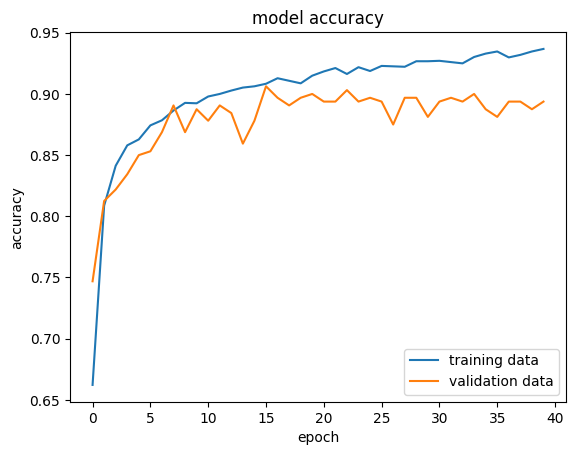

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [129]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

25/25 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9162
0.9162499904632568


In [130]:
print(X_test_std.shape)
print(X_test_std[0])

(800, 7)
[ 0.05005056 -0.95742945 -1.09332189 -0.48577166  1.5379072   0.96625658
  1.5767148 ]


In [131]:
Y_pred = model.predict(X_test_std)

25/25 [==============================] - 0s 2ms/step


In [132]:
print(Y_pred.shape)
print(Y_pred[0])

(800, 2)
[0.9817532  0.00802549]


In [133]:
print(X_test_std)

[[ 0.05005056 -0.95742945 -1.09332189 ...  1.5379072   0.96625658
   1.5767148 ]
 [-0.31959064  1.45950565 -0.10897085 ...  1.03802257 -2.34922775
   0.37313925]
 [ 0.0517071   1.29926031  0.46869968 ... -0.91930213 -0.42152107
  -0.37244699]
 ...
 [-0.45316478  0.89620982 -0.37406056 ...  0.86311612  0.16102485
   0.89710611]
 [ 0.64813076  1.07002612 -0.84674454 ...  0.35340751 -0.41885495
   0.58241446]
 [ 0.78746404 -0.54270122 -0.4680606  ... -0.13645191 -1.13068557
  -0.06002313]]


In [134]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [135]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 

In [138]:
input_data = (-3.970048523,-2.512336381,5.346329613,	-1.012008712,	1.844900361,	0.329839797,	-0.491590483)
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The apple is bad')

else:
  print('The apple is good')

1/1 [==============================] - 0s 32ms/step
[[0.05009728 0.9620597 ]]
[1]
The apple is good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
input_data = (-1.53860666,	-2.747844387,	1.844950057,	0.491249069,	-0.425815521,	1.25976818,	-1.680924092)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The apple is bad')

else:
  print('The apple is good')

1/1 [==============================] - 0s 36ms/step
[[0.9477187  0.03332545]]
[0]
The apple is bad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
